## Clustering Assignment
HELP International is an international humanitarian NGO that is committed to fighting poverty and providing the people of backward countries with basic amenities and relief during the time of disasters and natural calamities. It runs a lot of operational projects from time to time along with advocacy drives to raise awareness as well as for funding purposes.
<br><br>
After the recent funding programmes, they have been able to raise around $ 10 million. Now the CEO of the NGO needs to decide how to use this money strategically and effectively. The significant issues that come while making this decision are mostly related to choosing the countries that are in the direst need of aid. 
<br><br>
This asignment categorises the countries using some socio-economic and health factors that determine the overall development of the country using both K-means and Hierarchical Clustering.

The steps followed are:-
1. Loading the Dataset
2. Inspecting the dataset 
3. Handling outliers
4. Exploratory Data Analsysis
5. Modelling the data using K-Means Algorithm
6. Modelling the data using Hierarchical Clustering Algorithm
7. Visualizing the results for both the algorithms
8. Final Recommendation

In [1]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

### Loading the Dataset 

In [2]:
df = pd.read_csv('Country-data.csv')
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


### Inspecting the Dataset

In [3]:
df.shape

(167, 10)

We have 167 records and 10 columns

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


All the data types are as expected, so we do not need to change any data types.

In [5]:
# Since Country is the Key here, there should not be duplicate countries. Let's check if that is the case.
df.duplicated(subset = ['country'], keep = False).sum()

0

There are no duplicate countries.

In [6]:
# Checking the % of null values in each column
round(df.isnull().sum()/len(df.index)*100,2)

country       0.0
child_mort    0.0
exports       0.0
health        0.0
imports       0.0
income        0.0
inflation     0.0
life_expec    0.0
total_fer     0.0
gdpp          0.0
dtype: float64

There are no null values in any column.

In [7]:
# Checking the statistical spread of the data
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
90%,100.220000,70.800000,10.940000,75.420000,41220.000000,16.640000,80.400000,5.322000,41840.000000
95%,116.000000,80.570000,11.570000,81.140000,48290.000000,20.870000,81.400000,5.861000,48610.000000
99%,153.400000,160.480000,13.474000,146.080000,84374.000000,41.478000,82.370000,6.563600,79088.000000


- Child Mortality has huge variance. While the minimum value is just 2.6 children per 1000 births, the maximum being 208. The mortality increase is a lot higher from 3rd to 4th percentile, compared to 1st to 2nd percentile. Even the maximum value has no nearby counterparts, which is edvident from the high standard deviation.
- While some countires which are poor are not able to export even 0.20% of their GDPP, some countries export 200% of their GDP. - Health spending is evenly distributed. Since they are in percentage terms, it does not give a clear picture of the amount spent on healthcare. We will convert the percentages to actual amounts.
- The maximum value of import is 174, which shows that there are countries which have imports highr than their GDP. Self sufficient countries which are well developed, imports less than 0.1% of their GDPP. 
- As expected, income is also vastly spread with a high standard deviation for different countries.
- Countries with High Inflation, Low Life expectancy should be candidates for the assistance from our NGO HELP.

In [8]:
# Converting the percentage values of exports, health and imports to absolute values
df['exports'] = df['gdpp'] * ( df['exports'] / 100 )
df['health'] = df['gdpp'] * ( df['health'] / 100 )
df['imports'] = df['gdpp'] * ( df['imports'] / 100 )
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### Checking for outliers

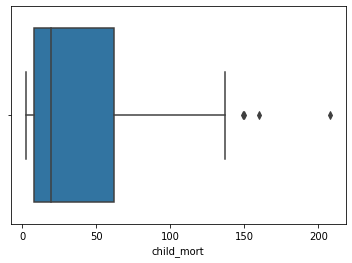

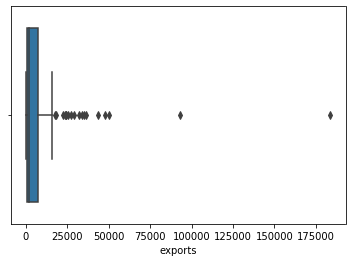

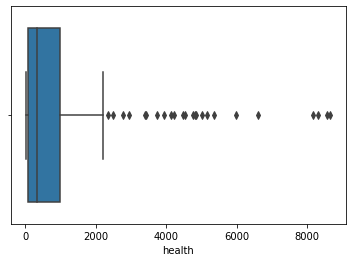

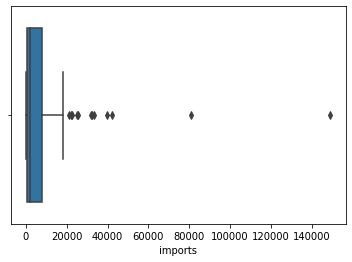

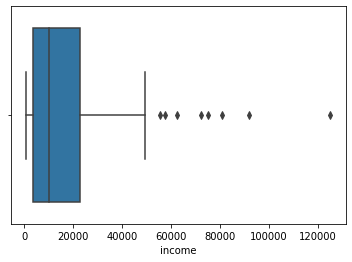

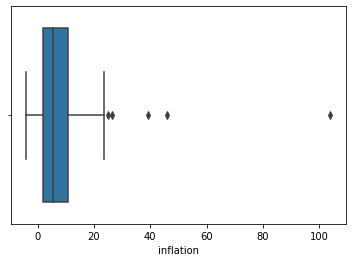

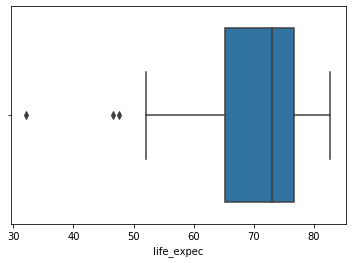

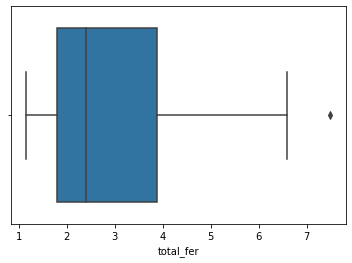

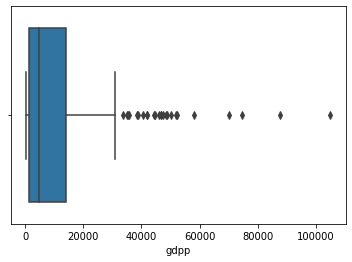

In [9]:
for i,c in enumerate(df):
    if ( df[c].dtype == np.float64 or df[c].dtype == np.int64 ):
        sns.boxplot(df[c])
        plt.xlabel(c)
        plt.show()

GDPP, Income and Inflation has high outliers. There are outliers in other columns as well, but we do not remove the outliers of all columns at this point. Since the countries which have GDPP high would be developed countries and would not need help from the NGO, we drop those countries which have GDPP beyond the 95 percentile and then check the condition of the outliers again.

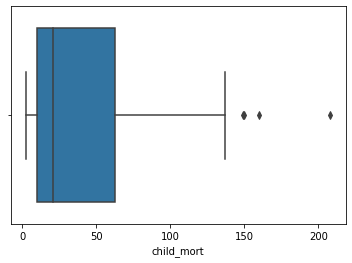

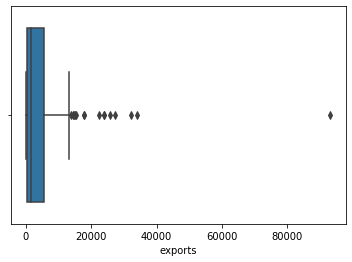

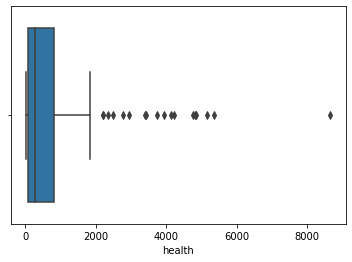

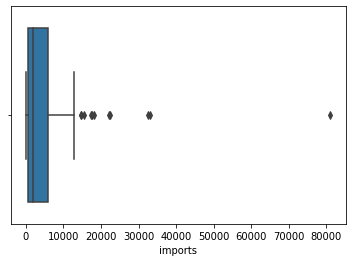

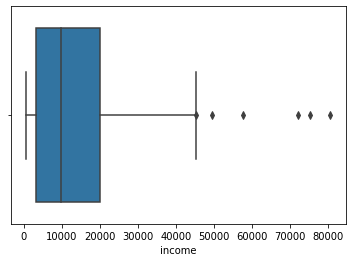

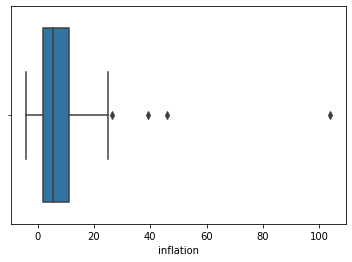

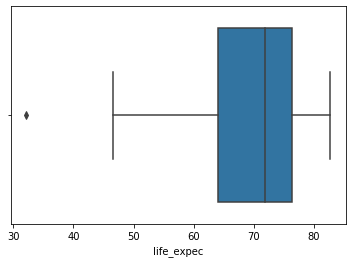

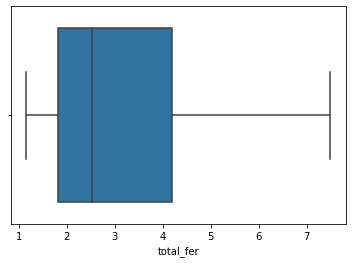

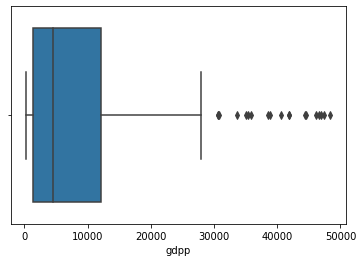

In [10]:
Q1 = df['gdpp'].quantile(0.05)
Q3 = df['gdpp'].quantile(0.95)
#IQR = Q3-Q1
df = df[(df['gdpp'] <= Q3)]
for i,c in enumerate(df):
    if ( df[c].dtype == np.float64 or df[c].dtype == np.int64 ):
        sns.boxplot(df[c])
        plt.xlabel(c)
        plt.show()

In [11]:
df.shape

(158, 10)

In [12]:
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,40.196203,4930.901567,781.770539,4672.041152,14614.955696,8.099367,69.966456,3.009620,9913.379747
std,40.622685,9588.714789,1316.883524,8370.829584,15224.031790,10.759661,8.780099,1.533079,12717.283188
min,2.600000,1.076920,12.821200,0.651092,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,10.300000,428.284500,67.989000,536.700000,3290.000000,1.935000,64.150000,1.810000,1310.000000
50%,20.900000,1634.595000,273.188000,1823.400000,9790.000000,5.460000,71.850000,2.530000,4480.000000
75%,62.500000,5629.750000,812.497500,5872.430000,20100.000000,11.175000,76.400000,4.200000,12075.000000
90%,103.100000,12796.470000,2246.874000,11676.000000,36200.000000,16.850000,80.030000,5.346000,31670.000000
95%,116.450000,18553.680000,3968.045000,15773.450000,41415.000000,21.125000,80.960000,5.912000,41815.000000
99%,154.300000,32987.598000,5243.796000,32783.304000,73433.000000,42.081000,82.301000,6.567200,47115.000000


We se that most of the outliers are handled by handling the GDPP column only.

In [13]:
# Since country column is the column to be clustered and will not be used in the algorithm, instead of dropping it, we make is as the index.
df.set_index('country',inplace = True)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


### Exploratory Data Analysis

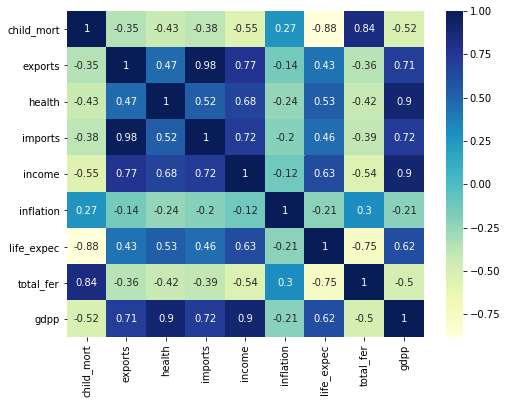

In [14]:
# Plotting the Heatmap to see the correlations between variables
plt.figure(figsize = (8,6))  
sns.heatmap(df.corr(),annot = True,cmap="YlGnBu")
plt.show()

As we can see from the Heatmap, the well being of the country is highly correlated to it's GDPP.
- A High GDPP has a direct correlation with Exports, Health, Imports and Income
- A Low GDPP has negative correlation with Child Mortality, Inflation and Fertitlity which shows that Health facilities and condition of the economy are poor in those countries.
- Thus it is a good indication that GDPP will be a key deciding factor while identifying countries which are in need for aid. 

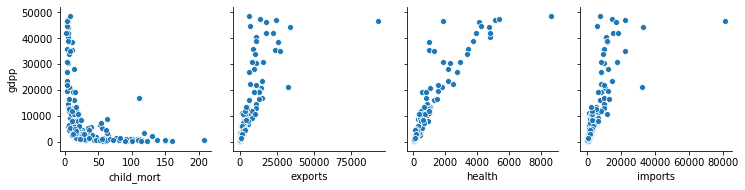

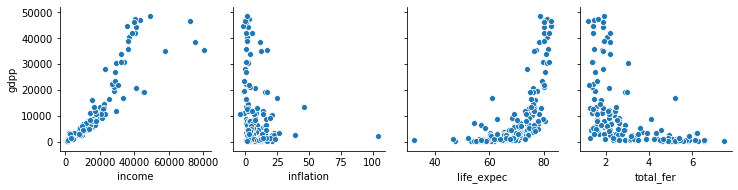

In [15]:
# Plotting a scalltrplot with the attributes Vs GDPP to see how the values are spread
x1 =sns.pairplot(df, palette='husl', x_vars=['child_mort','exports','health','imports'], y_vars=['gdpp'] )
plt.show()
x2 =sns.pairplot(df, palette='husl', x_vars=['income','inflation','life_expec','total_fer'], y_vars=['gdpp'] )
plt.show()

Overall we can see how low GDPP correlates to everything that is going wrong for a country. Health, Income, Imports and Exports even has a linear relation with GDPP.

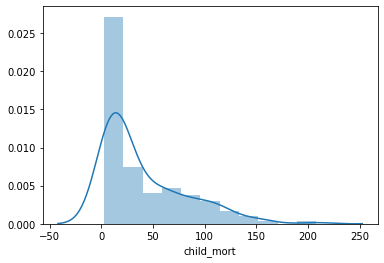

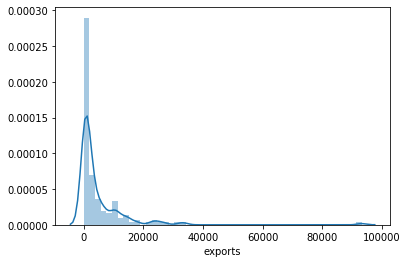

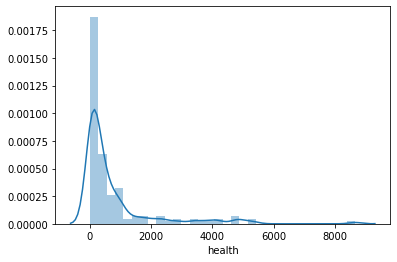

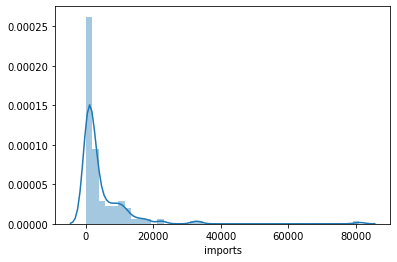

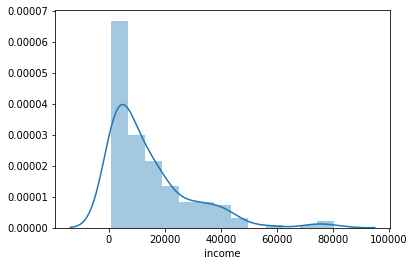

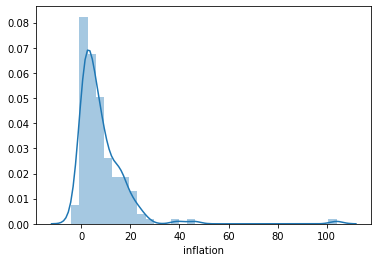

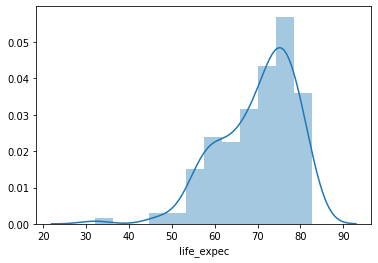

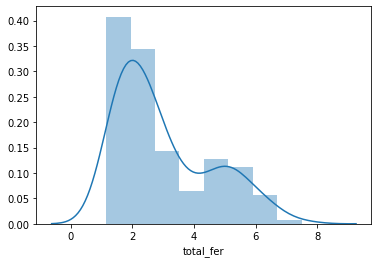

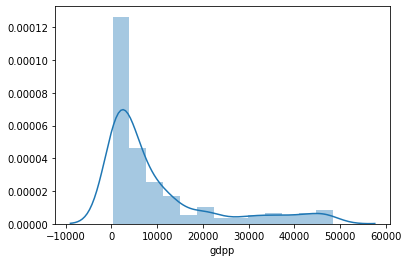

In [16]:
# Lets check how the Distribution of the Numerical values
for i,c in enumerate(df):
    sns.distplot(df[c])
    plt.xlabel(c)
    plt.show()

From the distribution, we see that the factors like GDPP, Inflation, Income, etc are all right skewed, which means that there are more countries which are in need of help than otherwise. Due to this, clustering is further necessary to identify those countries which need aid the most.

### Scaling the attributes

In [17]:
#Instantiating the Standard Scaler
scaler = StandardScaler()

# Fitting and Transfroming the original data into a new dataframe
df_scaled = scaler.fit_transform(df)
df_scaled = pd.DataFrame(df_scaled)
df_scaled.columns = df.columns
df_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.234847,-0.510090,-0.563608,-0.530152,-0.856955,0.124994,-1.572901,1.838989,-0.738376
1,-0.582710,-0.396063,-0.391462,-0.321693,-0.308713,-0.336520,0.723646,-0.889676,-0.459367
2,-0.318473,-0.336697,-0.453862,-0.392076,-0.113006,0.745941,0.746497,-0.078274,-0.430180
3,1.946065,-0.285794,-0.518900,-0.378423,-0.574267,1.333323,-1.127302,2.061470,-0.503541
4,-0.738289,0.064875,-0.035126,0.301255,0.295540,-0.620888,0.780774,-0.575585,0.180376


In [18]:
# Checking Hopkins Score to gauge if the data is suitable for Clustering by analysis it's clustering tendency
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [19]:
for i in range(10):
    print('The Hopkins Statistic for this Dataset is: ',hopkins(df_scaled))

The Hopkins Statistic for this Dataset is:  0.9202832851149968
The Hopkins Statistic for this Dataset is:  0.9396070806083998
The Hopkins Statistic for this Dataset is:  0.9504312465671755
The Hopkins Statistic for this Dataset is:  0.9326437254470236
The Hopkins Statistic for this Dataset is:  0.9240606019187988
The Hopkins Statistic for this Dataset is:  0.9168583938193853
The Hopkins Statistic for this Dataset is:  0.9302444086025363
The Hopkins Statistic for this Dataset is:  0.9070056512324702
The Hopkins Statistic for this Dataset is:  0.862113922817388
The Hopkins Statistic for this Dataset is:  0.8804640630018635


For every iteration, the hopkins score is around 0.90, thus indicating a good clustering trend and signifying that this data is a good candidate for clustering. 

### Modelling using K-Means
Since we need to group the most needy countries based upon the data available, we would approach the problem as a classification problem where we classify the countires in groups based upon their data available so that we can find a group or a cluster who is the most needy.<br>K-means clustering distinguishes itself from Hierarchical since it creates K random centroids scattered throughout the data.<br>Since the k-means algorithm computes the distance between two points, it is best suited hen applied to numeric data. As we have numeric data in our dataset, we choose K-Means clustering for our problem.

In [20]:
# K Means with some arbitrary value for K
kmeans5 = KMeans(n_clusters=4, max_iter=50, random_state=1)
kmeans5.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [21]:
# Checking the clust
kmeans5.labels_

array([1, 0, 0, 1, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0,
       3, 0, 1, 1, 0, 1, 3, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 3, 3, 0,
       0, 0, 0, 1, 1, 0, 0, 3, 3, 1, 1, 0, 3, 1, 3, 0, 0, 1, 1, 0, 1, 0,
       3, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 1, 1, 3, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 3, 1, 1, 3,
       1, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 3, 1, 0, 0, 1, 2, 3, 3, 1, 0, 3,
       3, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 3, 3, 3, 0, 0, 0,
       0, 0, 1, 1])

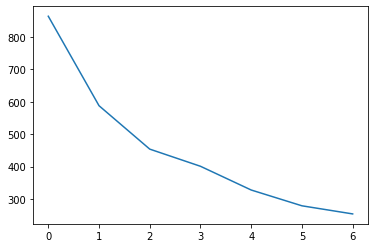

For num_cluster = 2 , silhouette score = 0.4769303319503148
For num_cluster = 3 , silhouette score = 0.4149565322037642
For num_cluster = 4 , silhouette score = 0.4248252843610891
For num_cluster = 5 , silhouette score = 0.3900239780252361
For num_cluster = 6 , silhouette score = 0.290974643427648
For num_cluster = 7 , silhouette score = 0.30572062939251937
For num_cluster = 8 , silhouette score = 0.24151115987091792


Text(0, 0.5, 'Silhouette Score')

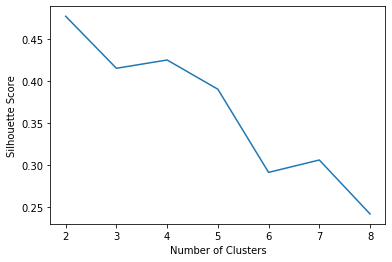

In [22]:
# Now that we have a intial model, we have to find the optimal number of clusters
# Checking with Elbow Curve / Sum of Squared Distances
range_n_clusters = [2,3,4,5,6,7,8]
ssd = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=1)
    kmeans.fit(df_scaled)    
    ssd.append(kmeans.inertia_)

plt.plot(ssd) 
plt.show()

# Also doing Silhouette Analysis to check the optimum number of clusters
sse = []
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50, random_state=1)
    kmeans.fit(df_scaled)  
    cluster_labels = kmeans.labels_
    
    # Compute silhouette score
    sil_avg = silhouette_score(df_scaled, cluster_labels)
    sse.append([num_clusters, silhouette_score(df_scaled, cluster_labels)])
    print('For num_cluster = {0} , silhouette score = {1}'.format(num_clusters,sil_avg))
plt.plot(pd.DataFrame(sse)[0], pd.DataFrame(sse)[1]) 
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')

2 has the highest silhouette score but having just 2 clusters would be very basic and not help us to identify countries in real need of aid. Thus we take 4 clusters as the final number of clusters since we can see from the above graph that the silhouette score is high for 4 clusters after 2. 

In [23]:
kmeans4 = KMeans(n_clusters=4, max_iter=50, random_state=1)
kmeans4.fit(df_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=1, tol=0.0001, verbose=0)

In [24]:
kmeans4.labels_

array([1, 0, 0, 1, 0, 0, 0, 3, 0, 3, 3, 0, 0, 0, 3, 0, 1, 0, 0, 0, 0, 0,
       3, 0, 1, 1, 0, 1, 3, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 3, 3, 0,
       0, 0, 0, 1, 1, 0, 0, 3, 3, 1, 1, 0, 3, 1, 3, 0, 0, 1, 1, 0, 1, 0,
       3, 0, 0, 0, 0, 3, 3, 0, 3, 0, 0, 1, 1, 3, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 3, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 3, 1, 1, 3,
       1, 0, 0, 0, 0, 0, 3, 0, 0, 1, 0, 3, 1, 0, 0, 1, 2, 3, 3, 1, 0, 3,
       3, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 3, 3, 3, 0, 0, 0,
       0, 0, 1, 1])

In [25]:
# Adding the cluster_id to the main dataframe
df['kmeans_cluster_id'] = kmeans4.labels_
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster_id
country,,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1
Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0
Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0
Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0


We will do further data anlaysis on the clusters formed but before that, we would also do hierarchical clustering and add labels for each country based on the same. 

### Modelling using Hierarchical Clustering
Hierarchical clustering is an alternative approach to k-means clustering for identifying groups in the dataset. It does not require us to pre-specify the number of clusters to be generated as is required by the k-means approach. Furthermore, hierarchical clustering has an added advantage over K-means clustering in that it results in an attractive tree-based representation of the observations, called a dendrogram, which gives us a visual understanding of deciding the cut, i.e. final number of clusters.

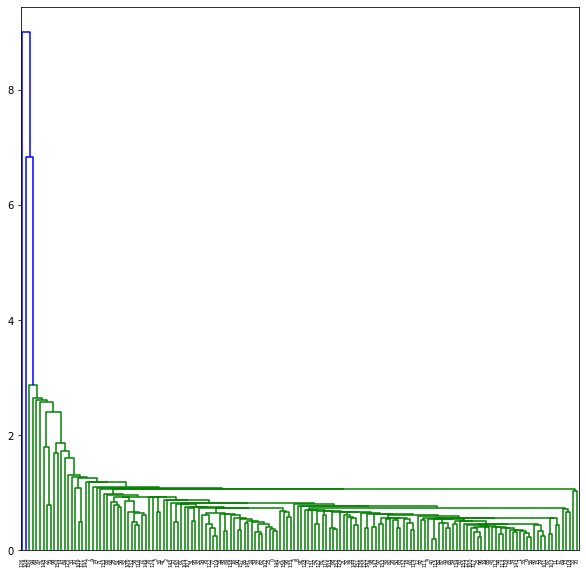

In [26]:
#We first try with single linkage
#Here, the distance between 2 clusters is defined as the shortest distance between points in the two clusters
#It computes all pairwise dissimilarities between the elements in cluster 1 and the elements in cluster 2, 
#and considers the smallest of these dissimilarities as a linkage criterion. 
#It tends to produce long, “loose” clusters.
mergings = linkage(df_scaled, method='single', metric='euclidean')
fig = plt.figure(figsize = (10,10))
dendrogram(mergings)
plt.show()

Since the single linkage dendrogram is not structured properly, we try with complete linkage to produce clusters which will have a proper tree-like structure.

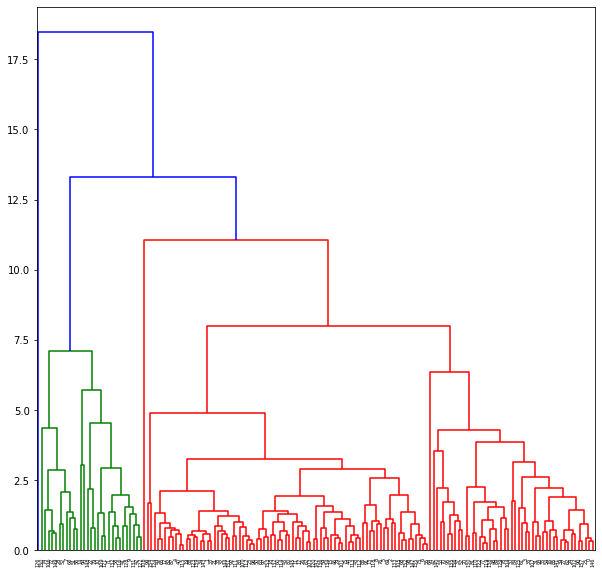

In [27]:
#Complete linkage computes all pairwise dissimilarities between the elements in cluster 1 and the elements in cluster 2, 
#and considers the largest value (i.e., maximum value) of these dissimilarities as the distance between the two clusters. 
#It tends to produce more compact clusters.
mergings = linkage(df_scaled, method='complete', metric='euclidean')
fig = plt.figure(figsize = (10,10))
dendrogram(mergings)
plt.show()

As you can see that the dendrogram has a clear tree structure and it is easier to identify the 'cut'. Since we have seen earlier than 4 clusters give us a near optimal result, we cut the dendrogram at 4 clusters.

In [28]:
# Cutting the dendrgram and creating a series with the clusters to add to the dataframe
hier = cut_tree(mergings, n_clusters=4)
hier = hier.reshape(-1,)
df['hier_cluster_id'] = hier
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster_id,hier_cluster_id
country,,,,,,,,,,,
Afghanistan,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553,1,0
Albania,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090,0,0
Algeria,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460,0,0
Angola,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530,1,0
Antigua and Barbuda,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200,0,0


### Analysing the results

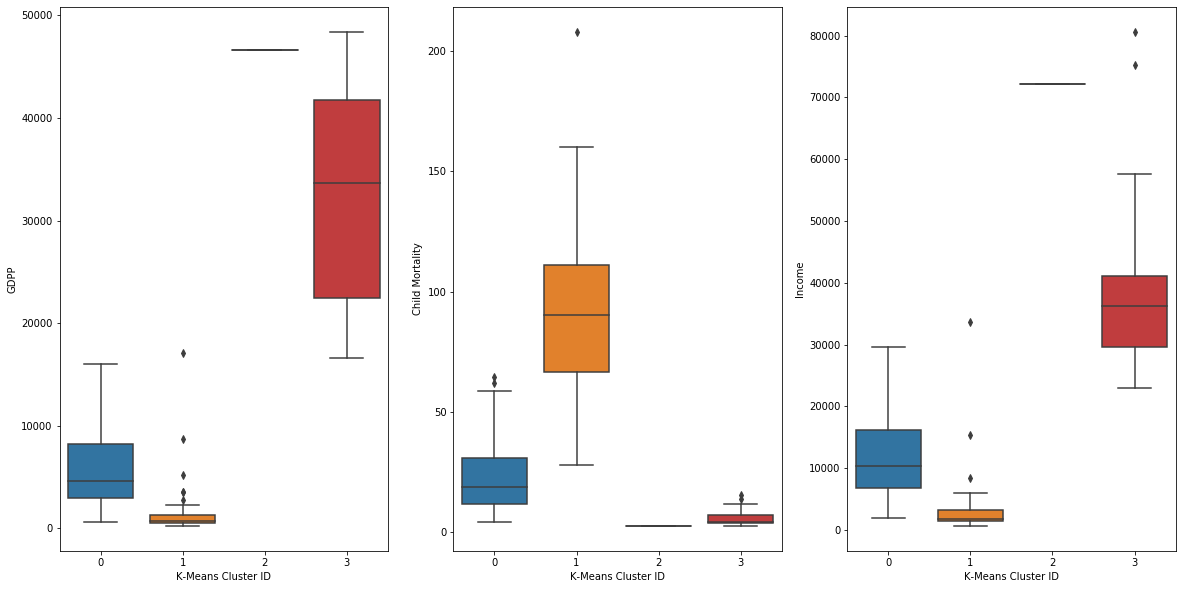

In [29]:
#Analysing K-Means clusters
fig, ax = plt.subplots(1,3,figsize=(20,10))
sns.boxplot(x='kmeans_cluster_id', y='gdpp', data=df, ax=ax[0])
sns.boxplot(x='kmeans_cluster_id', y='child_mort', data=df, ax=ax[1])
sns.boxplot(x='kmeans_cluster_id', y='income', data=df, ax=ax[2])
ax[0].set(xlabel='K-Means Cluster ID', ylabel='GDPP')
ax[1].set(xlabel='K-Means Cluster ID', ylabel='Child Mortality')
ax[2].set(xlabel='K-Means Cluster ID', ylabel='Income')

plt.show()

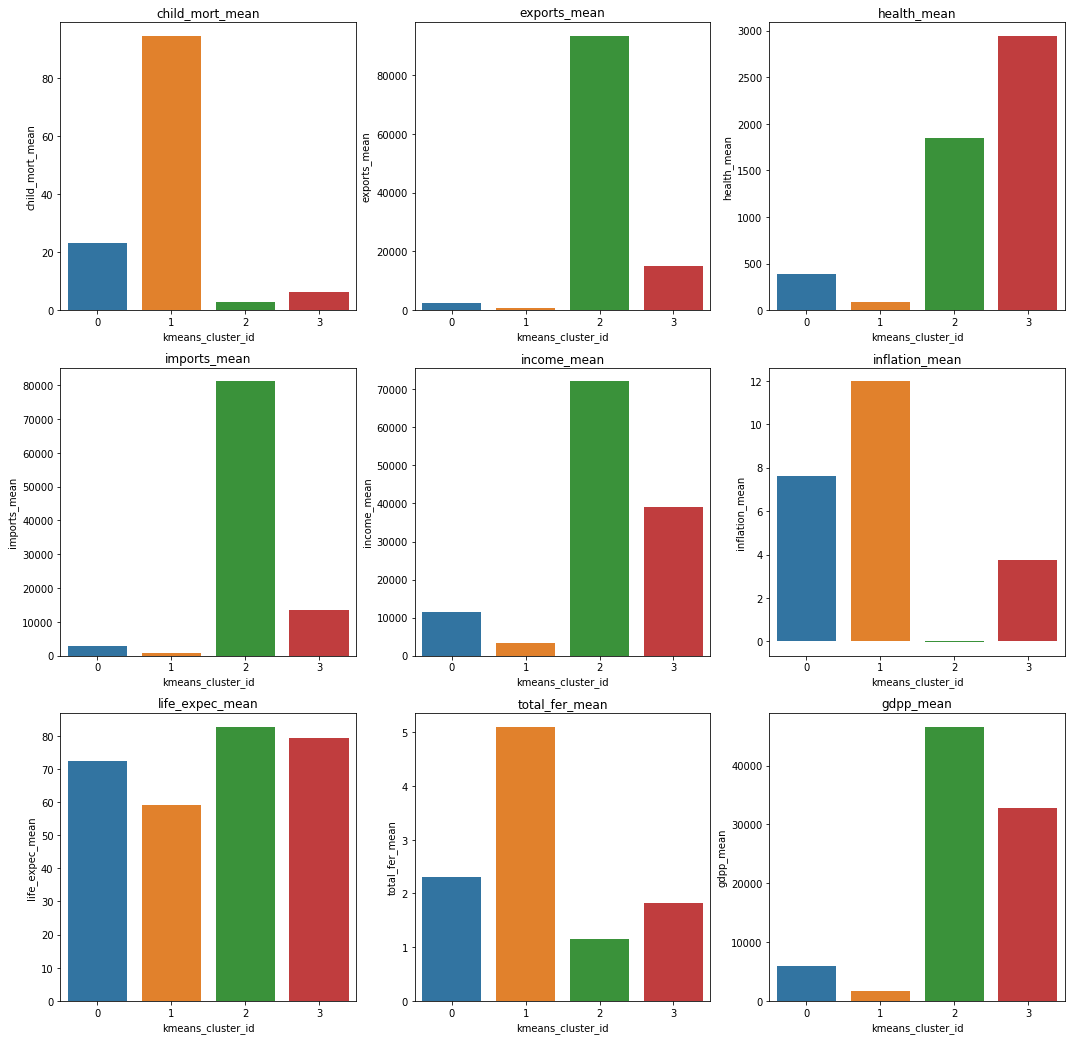

In [30]:
child_mort_mean = pd.DataFrame(df.groupby(['kmeans_cluster_id']).child_mort.mean())
exports_mean= pd.DataFrame(df.groupby(['kmeans_cluster_id']).exports.mean())
health_mean = pd.DataFrame(df.groupby(['kmeans_cluster_id']).health.mean())
imports_mean = pd.DataFrame(df.groupby(['kmeans_cluster_id']).imports.mean())
income_mean = pd.DataFrame(df.groupby(['kmeans_cluster_id']).income.mean())
inflat_mean = pd.DataFrame(df.groupby(['kmeans_cluster_id']).inflation.mean())
life_expec_mean = pd.DataFrame(df.groupby(['kmeans_cluster_id']).life_expec.mean())
total_fer_mean = pd.DataFrame(df.groupby(['kmeans_cluster_id']).total_fer.mean())
gdpp_mean = pd.DataFrame(df.groupby(['kmeans_cluster_id']).gdpp.mean())
country_analysis_df = pd.concat([pd.Series([0,1,2,3]),child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflat_mean,life_expec_mean,
                                 total_fer_mean,gdpp_mean], axis=1)
country_analysis_df.columns = ["kmeans_cluster_id","child_mort_mean","exports_mean","health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
plt.figure(figsize = (18,18))
plt.figure(1)

# subplot 1
plt.subplot(3, 3, 1)
plt.title("child_mort_mean")
sns.barplot(country_analysis_df.kmeans_cluster_id, country_analysis_df.child_mort_mean)

# subplot 2 
plt.subplot(3, 3, 2)
plt.title("exports_mean")
sns.barplot(country_analysis_df.kmeans_cluster_id, country_analysis_df.exports_mean)

# subplot 3
#plt.figure(2)
plt.subplot(3, 3, 3)
plt.title("health_mean")
sns.barplot(country_analysis_df.kmeans_cluster_id, country_analysis_df.health_mean)

# subplot 4 
plt.subplot(3, 3, 4)
plt.title("imports_mean")
sns.barplot(country_analysis_df.kmeans_cluster_id, country_analysis_df.imports_mean)

# subplot 5 
plt.subplot(3, 3, 5)
plt.title("income_mean")
sns.barplot(country_analysis_df.kmeans_cluster_id, country_analysis_df.income_mean)

# subplot 6 
plt.subplot(3, 3, 6)
plt.title("inflation_mean")
sns.barplot(country_analysis_df.kmeans_cluster_id, country_analysis_df.inflation_mean)

# subplot 7 
plt.subplot(3, 3, 7)
plt.title("life_expec_mean")
sns.barplot(country_analysis_df.kmeans_cluster_id, country_analysis_df.life_expec_mean)

# subplot 8
plt.subplot(3, 3, 8)
plt.title("total_fer_mean")
sns.barplot(country_analysis_df.kmeans_cluster_id, country_analysis_df.total_fer_mean)

# subplot 9
plt.subplot(3, 3, 9)
plt.title("gdpp_mean")
sns.barplot(country_analysis_df.kmeans_cluster_id, country_analysis_df.gdpp_mean)

plt.show()

It is clearly visiblefrom the above plot that Cluster 1 pf K-Means clustering has the poorest countries and  they are in need of aid. Cluster 2 and 3 are the richest ones and are doing very well on development parameters like GDPP, Income, Child Mortality, etc. Thus we can consider as follows:<br>
- Cluster 2 and 3 are developed countries.
- Cluster 0 are developing countries. 
- Cluster 1 are under developed countries, in need for aid.

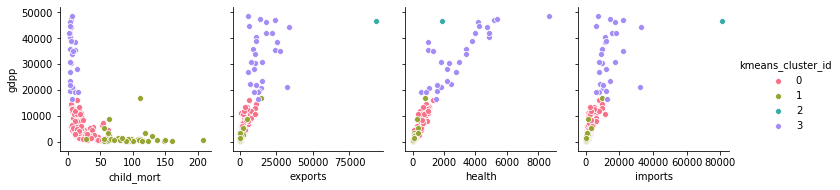

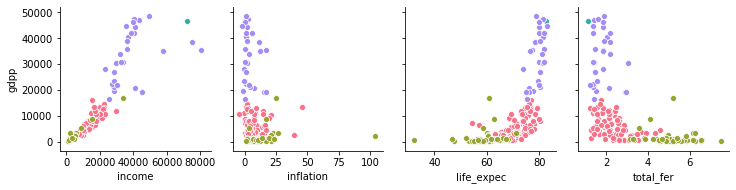

In [31]:
# Plotting the same pairplot as before but with K-Means Cluster ID as a differentiator
x1 =sns.pairplot(df, palette='husl', x_vars=['child_mort','exports','health','imports'], y_vars=['gdpp'] , hue='kmeans_cluster_id')
plt.show()
x2 =sns.pairplot(df, palette='husl', x_vars=['income','inflation','life_expec','total_fer'], y_vars=['gdpp'] , hue='kmeans_cluster_id' )
x2._legend.remove()
plt.show()

The data points in green are the countries in need for aid.

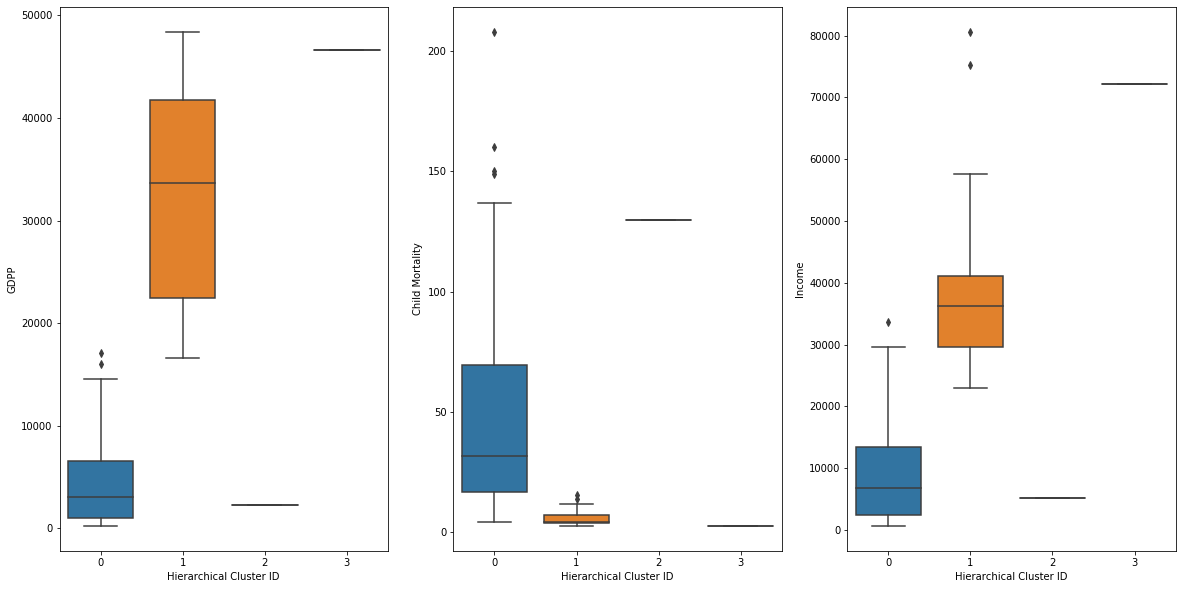

In [32]:
#Analysing Hierachical clusters
fig, ax = plt.subplots(1,3,figsize=(20,10))
sns.boxplot(x='hier_cluster_id', y='gdpp', data=df, ax=ax[0])
sns.boxplot(x='hier_cluster_id', y='child_mort', data=df, ax=ax[1])
sns.boxplot(x='hier_cluster_id', y='income', data=df, ax=ax[2])
ax[0].set(xlabel='Hierarchical Cluster ID', ylabel='GDPP')
ax[1].set(xlabel='Hierarchical Cluster ID', ylabel='Child Mortality')
ax[2].set(xlabel='Hierarchical Cluster ID', ylabel='Income')

plt.show()

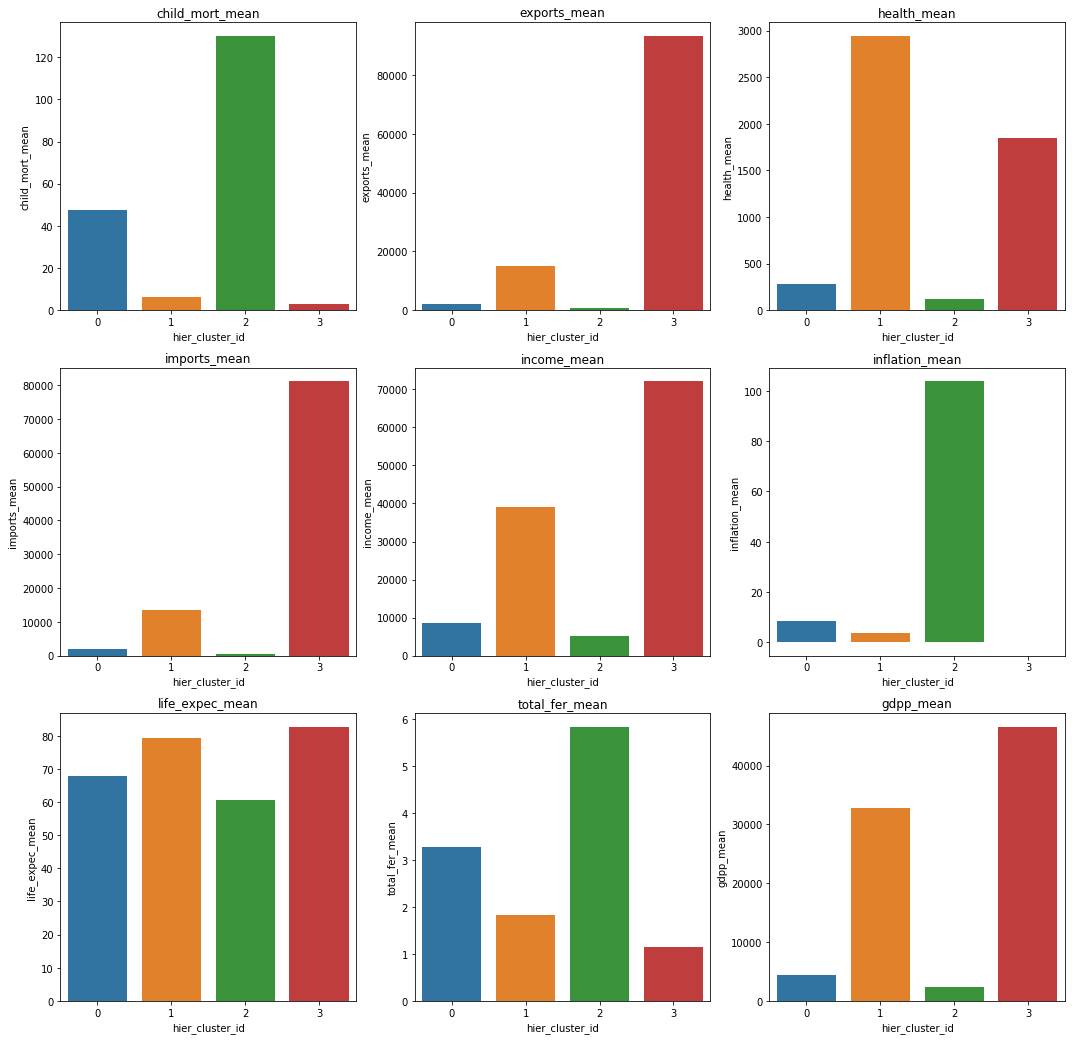

In [33]:
child_mort_mean = pd.DataFrame(df.groupby(['hier_cluster_id']).child_mort.mean())
exports_mean= pd.DataFrame(df.groupby(['hier_cluster_id']).exports.mean())
health_mean = pd.DataFrame(df.groupby(['hier_cluster_id']).health.mean())
imports_mean = pd.DataFrame(df.groupby(['hier_cluster_id']).imports.mean())
income_mean = pd.DataFrame(df.groupby(['hier_cluster_id']).income.mean())
inflat_mean = pd.DataFrame(df.groupby(['hier_cluster_id']).inflation.mean())
life_expec_mean = pd.DataFrame(df.groupby(['hier_cluster_id']).life_expec.mean())
total_fer_mean = pd.DataFrame(df.groupby(['hier_cluster_id']).total_fer.mean())
gdpp_mean = pd.DataFrame(df.groupby(['hier_cluster_id']).gdpp.mean())
country_analysis_df = pd.concat([pd.Series([0,1,2,3]),child_mort_mean,exports_mean,health_mean,imports_mean,income_mean,inflat_mean,life_expec_mean,
                                 total_fer_mean,gdpp_mean], axis=1)
country_analysis_df.columns = ["hier_cluster_id","child_mort_mean","exports_mean","health_mean","imports_mean","income_mean","inflation_mean","life_expec_mean","total_fer_mean","gdpp_mean"]
plt.figure(figsize = (18,18))
plt.figure(1)

# subplot 1
plt.subplot(3, 3, 1)
plt.title("child_mort_mean")
sns.barplot(country_analysis_df.hier_cluster_id, country_analysis_df.child_mort_mean)

# subplot 2 
plt.subplot(3, 3, 2)
plt.title("exports_mean")
sns.barplot(country_analysis_df.hier_cluster_id, country_analysis_df.exports_mean)

# subplot 3
#plt.figure(2)
plt.subplot(3, 3, 3)
plt.title("health_mean")
sns.barplot(country_analysis_df.hier_cluster_id, country_analysis_df.health_mean)

# subplot 4 
plt.subplot(3, 3, 4)
plt.title("imports_mean")
sns.barplot(country_analysis_df.hier_cluster_id, country_analysis_df.imports_mean)

# subplot 5 
plt.subplot(3, 3, 5)
plt.title("income_mean")
sns.barplot(country_analysis_df.hier_cluster_id, country_analysis_df.income_mean)

# subplot 6 
plt.subplot(3, 3, 6)
plt.title("inflation_mean")
sns.barplot(country_analysis_df.hier_cluster_id, country_analysis_df.inflation_mean)

# subplot 7 
plt.subplot(3, 3, 7)
plt.title("life_expec_mean")
sns.barplot(country_analysis_df.hier_cluster_id, country_analysis_df.life_expec_mean)

# subplot 8
plt.subplot(3, 3, 8)
plt.title("total_fer_mean")
sns.barplot(country_analysis_df.hier_cluster_id, country_analysis_df.total_fer_mean)

# subplot 9
plt.subplot(3, 3, 9)
plt.title("gdpp_mean")
sns.barplot(country_analysis_df.hier_cluster_id, country_analysis_df.gdpp_mean)

plt.show()

From the hierarchical clustering it is evident that Cluster 1 and 3 are the richest of the lot with high income and high GDPP and cluster 0 and 2 are the poorer countries with low income and high child mortality rates.
- Cluster 1 and 3 are developed countries.
- Cluster 0 and 2 are developing/under developed countries.
- Cluster 2 has very less number of datapoints, so we will have to identify countries from cluster 0 itself.

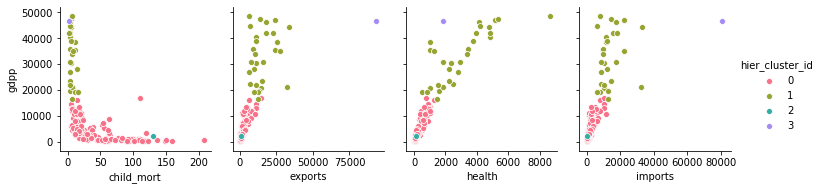

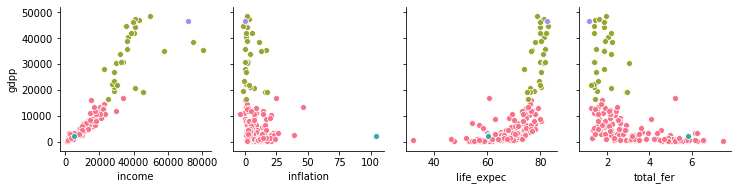

In [34]:
# Plotting the same pairplot as before but with Hierarchical Clustering Cluster ID as a differentiator
x1 =sns.pairplot(df, palette='husl', x_vars=['child_mort','exports','health','imports'], y_vars=['gdpp'] , hue='hier_cluster_id')
plt.show()
x2 =sns.pairplot(df, palette='husl', x_vars=['income','inflation','life_expec','total_fer'], y_vars=['gdpp'] , hue='hier_cluster_id' )
x2._legend.remove()
plt.show()

The data points in pink and blue are the countries that are in need for aid.

In [35]:
# Checking the raw data now and the country names which have been identified by the two algorithms eligible for aid
kmeans_result = df[df['kmeans_cluster_id']==1]
kmeans_result.reset_index(inplace=True)
kmeans_result.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster_id,hier_cluster_id
4,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,1,0
24,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,1,0
9,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,1,0
31,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,1,0
36,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,1,0
25,Madagascar,62.2,103.2500,15.5701,177.590,1390,8.79,60.8,4.60,413,1,0
29,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,1,0
6,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,1,0
26,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459,1,0
13,Eritrea,55.2,23.0878,12.8212,112.306,1420,11.60,61.7,4.61,482,1,0


As per K-Means, the countries with dire need of aid are:-
- Burundi
- Liberia
- Congo, Dem. Rep.  
- Niger
- Sierra Leone
- Madagascar  
- Mozambique  
- Central African Republic
- Malawi
- Eritrea  

In [36]:
# Checking for Hierachical Clustering results now
hier_result = df[df['hier_cluster_id']==0]
hier_result.reset_index(inplace=True)
hier_result.sort_values(['gdpp','income','child_mort','health','inflation','life_expec','total_fer','imports','exports'], 
                      ascending=[True,True,False,True,False,True,False,False,True]).head(10)

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,kmeans_cluster_id,hier_cluster_id
20,Burundi,93.6,20.6052,26.7960,90.552,764,12.30,57.7,6.26,231,1,0
68,Liberia,89.3,62.4570,38.5860,302.802,700,5.47,60.8,5.02,327,1,0
30,"Congo, Dem. Rep.",116.0,137.2740,26.4194,165.664,609,20.80,57.5,6.54,334,1,0
88,Niger,123.0,77.2560,17.9568,170.868,814,2.55,58.8,7.49,348,1,0
102,Sierra Leone,160.0,67.0320,52.2690,137.655,1220,17.20,55.0,5.20,399,1,0
72,Madagascar,62.2,103.2500,15.5701,177.590,1390,8.79,60.8,4.60,413,1,0
84,Mozambique,101.0,131.9850,21.8299,193.578,918,7.64,54.5,5.56,419,1,0
24,Central African Republic,149.0,52.6280,17.7508,118.190,888,2.01,47.5,5.21,446,1,0
73,Malawi,90.5,104.6520,30.2481,160.191,1030,12.10,53.1,5.31,459,1,0
40,Eritrea,55.2,23.0878,12.8212,112.306,1420,11.60,61.7,4.61,482,1,0


As per Hierarchical Clustering, the countries with dire need of aid are:-
- Burundi
- Liberia
- Congo, Dem. Rep.  
- Niger
- Sierra Leone
- Madagascar  
- Mozambique  
- Central African Republic
- Malawi
- Eritrea  

## Final Recommendation

#### We got same countries by both K-means and Heirarchical Clustering: Both the algorithms have taken all the attributes in the dataset into consideration. It has clustered countires with Low GDPP, Low Income, Low Health Expenditure, Low Life Expectancy and Low Exports along with High Child Mortality and High Inflation as the negatives. Therefore following are the top 10 countries which are in direst need of aid by considering socio – economic factor into consideration:

1. Burundi
2. Liberia
3. Congo, Dem. Rep.
4. Niger
5. Sierra Leone
6. Madagascar
7. Mozambique
8. Central African Republic
9. Malawi
10. Eritrea